In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# bill

In [ ]:
df = pd.read_csv('file2.csv')

In [6]:
bills = df.columns[df.columns.str.contains('srno|yyyymm|bill')]
bill_df = df[bills]
bill_df = bill_df.rename(columns={'srno_2':'id', 'yyyymm':'month'})
bill_df['month'] = pd.to_datetime(bill_df['month'], format='%Y%m')

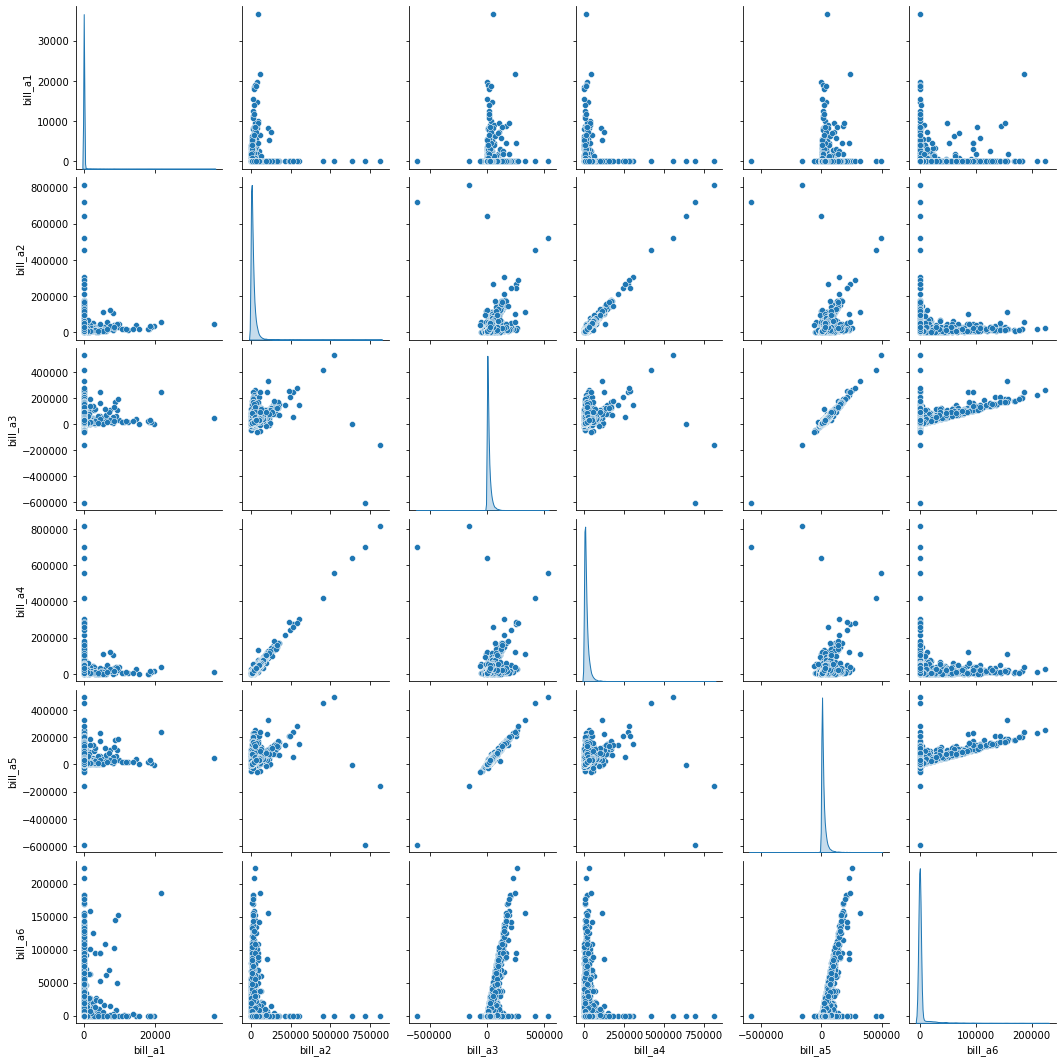

In [3]:
sns.pairplot(bill_df.groupby('id').mean().sample(n=10000, random_state=1), diag_kind='kde')##

In [4]:
def group(x):
    if x<0:
        return '<0'
    elif x==0:
        return '=0'
    else:
        return '>0'
bill_df.drop(['id', 'month'], axis=1).applymap(group).apply(pd.Series.value_counts)/bill_df.shape[0]

,bill_a1,bill_a2,bill_a3,bill_a4,bill_a5,bill_a6
<0,NaN,NaN,0.031684,NaN,0.030922,NaN
=0,0.990675,0.11726,0.120027,0.139667,0.117466,0.921915
>0,0.009325,0.88274,0.848289,0.860333,0.851611,0.078085


可知只有biil_a3, biil_a5會有負值(數量大概3%)

但不確定這裡負值的意義...

另外bill_a1跟bill_a6裡有很多0

這邊把負數砍掉再畫一次

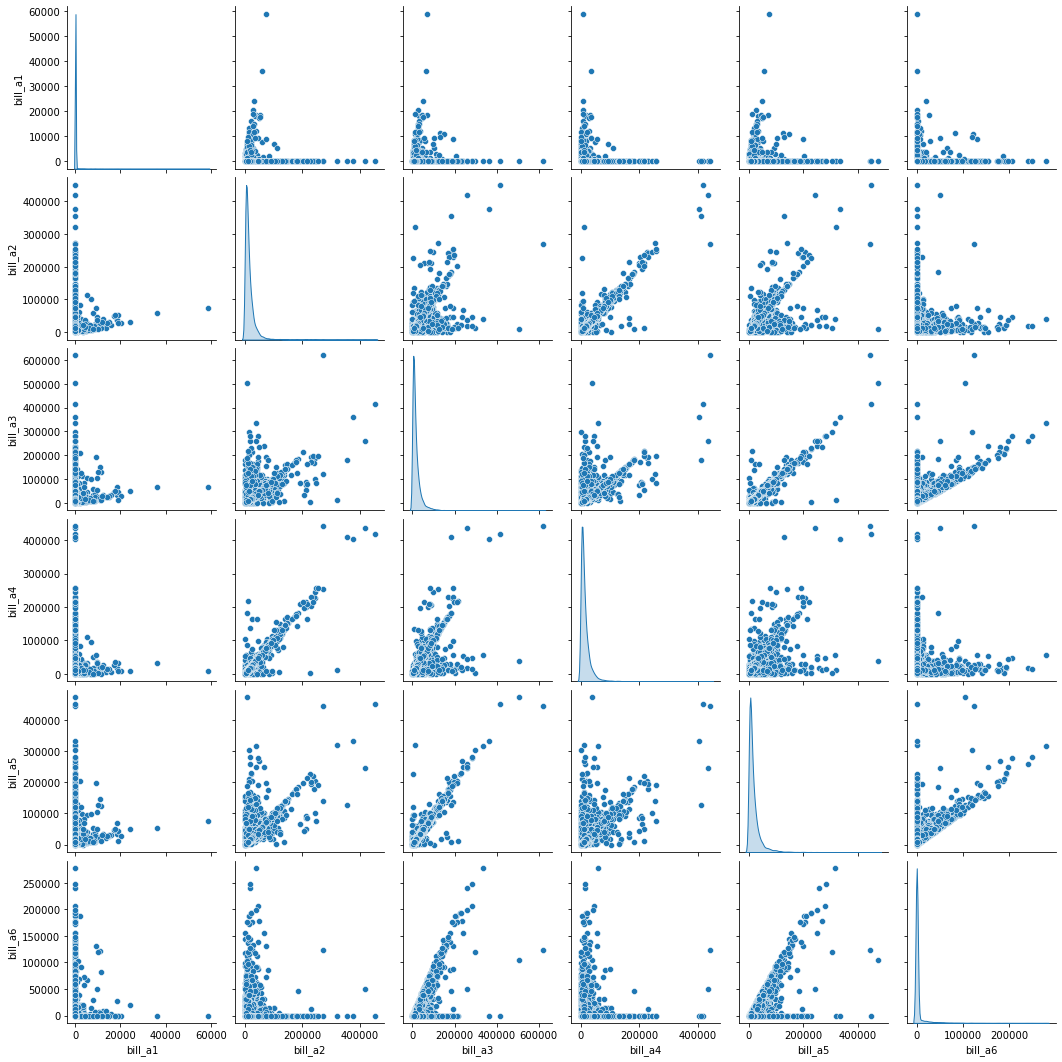

In [5]:
not_negative_make = (bill_df['bill_a3'] > 0) & (bill_df['bill_a5'] > 0) 
sns.pairplot(bill_df[not_negative_make].groupby('id').mean().sample(n=10000, random_state=1), diag_kind='kde')
#p.set(ylim=(0,None), xlim=(0,None))